In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
# yearly donations and spendings
cash_in = np.array([2,2.2,2.4,2.8,3.2,3.6,3.5,3.4,3.4,3.4]).reshape((-1,1))
cash_out = np.array([1.7,1.8,1.9,2.0,2.2,2.3,2.4,2.5,2.6,2.7]).reshape((-1,1))

# mean and standard deviation for each asset returns
mu = np.array([0.057,0.054,0.052,0.05,0.033,0.063,0.028]).reshape((-1,1))
sd = np.array([0.176,0.187,0.243,0.192,0.037,0.066,0.056]).reshape((-1,1))

# correlation between each assets
corr = np.array(([1,0.74,0.67,0.74,0.13,0.47,0.02],[0.74,1,0.7,0.78,0.09,0.46,0],[0.67,0.7,1,0.66,0.07,0.45,-0.03],[0.74,0.78,0.66,1,0.1,0.37,-0.03],[0.13,0.09,0.07,0.1,1,0.1,0.1],[0.47,0.46,0.45,0.37,0.1,1,0.55],[0.02,0,-0.03,-0.03,0.1,0.55,1]))

# covariance matrix for asset returns
sigma = np.zeros(corr.shape)
for i in range(7):
  for j in range(7):
    sigma[i,j] = corr[i,j] * sd[i]*sd[j]

**The following cell simulates the distribution of maximum wealth at year 10**

Text(0.5, 1.0, 'Range of maximum wealth')

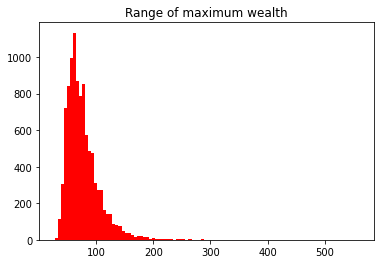

In [6]:
W_max = []
for i in range(10000):
  scenario_num = 1000
  x= np.random.multivariate_normal([0.057,0.054,0.052,0.05,0.033,0.063,0.028],sigma,scenario_num).T
  r = np.exp(x)-1
  mix = np.array(([0,0,0,0,0.7,0.08,0.22],[0,0,0,0,0.57,0.43,0],[0,0,0,0,0.34,0.66,0],[0,0,0,0,0.12,0.88,0],[0.03,0,0.16,0,0,0.81,0],[0.06,0,0.42,0,0,0.52,0],[0.09,0,0.69,0,0,0.22,0]))
  rp = np.dot(mix,r) # portfolio return for each mix
  x = np.amax(rp,axis = 0).reshape((1,-1)) # row vector where each entry is the maximum return of each scenario

  w = 15 # initial wealth
  for j in range(10):# change this line for different years
    id = random.randint(1,scenario_num-1)
    w = (w+cash_in[j]-cash_out[j])*(1+x[0,id])
  W_max.append(int(w))

plt.hist(W_max,bins = 100,color = 'r')
plt.title("Range of maximum wealth")

**The following cell simulates the distribution of minimum wealth at year 10**

Text(0.5, 1.0, 'Range of minimum wealth')

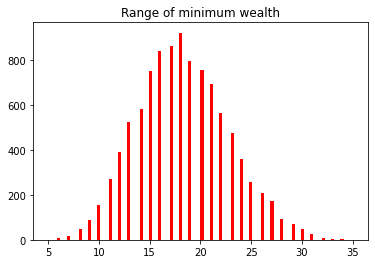

In [7]:
W_min = []
for i in range(10000):
  scenario_num = 1000
  x= np.random.multivariate_normal([0.057,0.054,0.052,0.05,0.033,0.063,0.028],sigma,scenario_num).T
  r = np.exp(x)-1
  mix = np.array(([0,0,0,0,0.7,0.08,0.22],[0,0,0,0,0.57,0.43,0],[0,0,0,0,0.34,0.66,0],[0,0,0,0,0.12,0.88,0],[0.03,0,0.16,0,0,0.81,0],[0.06,0,0.42,0,0,0.52,0],[0.09,0,0.69,0,0,0.22,0]))
  rp = np.dot(mix,r) # each column is one scenario and each row is the return of that mix
  x = np.amin(rp,axis = 0).reshape((1,-1)) # row vector where each entry is the maximum return of each scenario

  w = 15 # initial wealth
  for j in range(10):
    id = random.randint(1,scenario_num-1)
    w = (w+cash_in[j]-cash_out[j])*(1+x[0,id])
  W_min.append(int(w))

plt.hist(W_min,bins = 100,color = 'r')
plt.title("Range of minimum wealth")

**Based on the above simulations, we could have a resonable guess for the level of wealth at year 10, which roughly ranges from 5 to 150**

**We first define the Utility function for different levels of wealth**

In [8]:
def Utility(W):
  if(W>= 110):
    return 5.8*(W**0.5-1)/0.5
  elif (W>=100 and W<110):
    return W
  elif W <100 and W >= 95:
    return 1.01*(W-np.exp(-0.001*(100 - W)))
  elif W < 95 and W >= 0:
    return W - 0.2*(95 - W)**2

**creating senarios**

In [9]:
scenario_num = 500
x= np.random.multivariate_normal([0.057,0.054,0.052,0.05,0.033,0.063,0.028],sigma,scenario_num).T
r = np.exp(x) - 1
mix = np.array(([0,0,0,0,0.7,0.08,0.22],[0,0,0,0,0.57,0.43,0],[0,0,0,0,0.34,0.66,0],[0,0,0,0,0.12,0.88,0],[0.03,0,0.16,0,0,0.81,0],[0.06,0,0.42,0,0,0.52,0],[0.09,0,0.69,0,0,0.22,0]))
rp = np.dot(mix,r) # each column is one scenario and each row is the return of that mix

**The next step is to construct the table for each stage, where each table consists of 3 columns: w(level of wealth),EU(expected unitility) and decision(a.k.a: which mix to take)**

**We then define the class table to represent each stage**

In [10]:
class Table:
  def __init__(self, wealth, EU, decisions):
    self.wealth = wealth
    self.EU = EU
    self.decisions = decisions

**creating table 10 which only consists of w_level and utility**

In [11]:
Table10 = Table(list(np.linspace(5,120,116)),[Utility(i) for i in list(np.linspace(5,120,116))],[])

In [12]:
def createTable(nextTable):
  thisTable = Table(list(np.linspace(5,120,116)),[],[])
  for w in thisTable.wealth:
    EUlist = []
    w_next = w*(1+rp)
    for i in range(7):
      sumEU = 0
      for j in range(scenario_num):
        if np.floor(w_next[i][j]) > 120:
          w_next[i][j] = 120
        elif np.floor(w_next[i][j]) < 5:
          w_next[i][j] = 5
        id = nextTable.wealth.index(np.floor(w_next[i][j]))
        tempEu = nextTable.EU[id]
        sumEU = sumEU + tempEu
      EUlist.append(sumEU/scenario_num)
    thisTable.EU.append(max(EUlist))
    thisTable.decisions.append(EUlist.index(max(EUlist)))
  return thisTable

**Creating table 9 using table 10**

In [13]:
Table9 = createTable(Table10)
Table8 = createTable(Table9)
Table7 = createTable(Table8)
Table6 = createTable(Table7)
Table5 = createTable(Table6)
Table4 = createTable(Table5)
Table3 = createTable(Table4)
Table2 = createTable(Table3)
Table1 = createTable(Table2)

In [14]:
Table0 = Table([15,17,20,22],[],[])

for w in Table0.wealth:
  EUlist = []
  w_next = w*(1+rp)
  for i in range(7): # go through each mix
    sumEU = 0
    for j in range(scenario_num):# go through each scenario
       if np.floor(w_next[i][j]) > 120:
         w_next[i][j] = 120
       elif np.floor(w_next[i][j]) < 5:
         w_next[i][j] = 5
       id = Table1.wealth.index(np.floor(w_next[i][j]))
       tempEu = Table1.EU[id]
       sumEU = sumEU + tempEu
    EUlist.append(sumEU/scenario_num)# average EU
  Table0.EU.append(max(EUlist))
  Table0.decisions.append(EUlist.index(max(EUlist)))

In [15]:
wealth0 = Table0.wealth
EU0 = Table0.EU
Decision0 = Table0.decisions

In [16]:
Decision0

[6, 6, 5, 4]

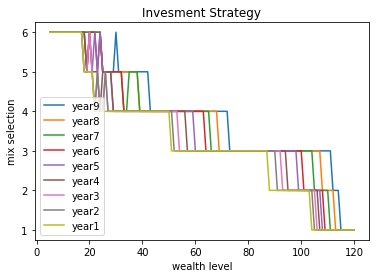

In [17]:
x = list(np.linspace(5,120,116))
plt.plot(x,Table9.decisions,label='year9')
plt.plot(x,Table8.decisions,label='year8')
plt.plot(x,Table7.decisions,label='year7')
plt.plot(x,Table6.decisions,label='year6')
plt.plot(x,Table5.decisions,label='year5')
plt.plot(x,Table4.decisions,label='year4')
plt.plot(x,Table3.decisions,label='year3')
plt.plot(x,Table2.decisions,label='year2')
plt.plot(x,Table1.decisions,label='year1')
plt.xlabel('wealth level')
plt.ylabel('mix selection')
plt.title("Invesment Strategy")
plt.legend()

**Testing model**

Text(0.5, 1.0, 'Distribution of wealth at year 10')

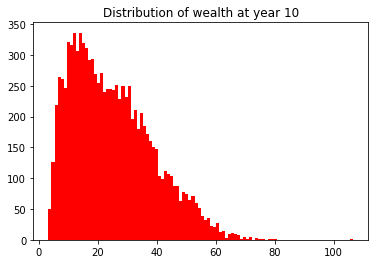

In [133]:
W = []
Tables = [Table0,Table1,Table2,Table3,Table4,Table5,Table6,Table7,Table8,Table9,Table10]
for i in range(10000):
  w = 15
  for j in range(10):
    x = np.random.multivariate_normal([0.057,0.054,0.052,0.05,0.033,0.063,0.028],sigma,10).T
    r = np.exp(x) - 1
    mix = np.array(([0,0,0,0,0.7,0.08,0.22],[0,0,0,0,0.57,0.43,0],[0,0,0,0,0.34,0.66,0],[0,0,0,0,0.12,0.88,0],[0.03,0,0.16,0,0,0.81,0],[0.06,0,0.42,0,0,0.52,0],[0.09,0,0.69,0,0,0.22,0]))
    rp = np.dot(mix,r)
    rp = rp.T
    if np.floor(w) < 5:
      w = 5.1
    w = np.floor(w)*(1+rp[j][Tables[j].decisions[Tables[j].wealth.index(np.floor(w))]])
  W.append(w)

plt.hist(W,bins = 100,color = 'r')
plt.title("Distribution of wealth at year 10")
    
    